# Principle Component Analysis and Reconstruction

Let's do a PCA and reconstruct pictures of faces in the PCA basis.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Load Data

*faces.csv* is composed of facial pictures of 38 individuals under 64 different lighting conditions.

In [2]:
faces = pd.read_csv('faces.csv', header=None)
faces.shape

(2414, 8064)

In [3]:
faces.head(3)

,0,1,2,3,4,5,6,7,8,9,...,8054,8055,8056,8057,8058,8059,8060,8061,8062,8063
0,0.31373,0.31373,0.32549,0.32157,0.32157,0.31765,0.32157,0.30588,0.27059,0.23529,...,0.184310,0.15294,0.152940,0.149020,0.125490,0.121570,0.117650,0.078431,0.062745,0.050980
1,0.35686,0.35294,0.35294,0.36471,0.35294,0.34510,0.35294,0.34118,0.29412,0.23137,...,0.121570,0.10588,0.094118,0.070588,0.054902,0.043137,0.054902,0.043137,0.031373,0.031373
2,0.26667,0.29412,0.31373,0.34902,0.36471,0.36471,0.38431,0.37647,0.33333,0.25490,...,0.062745,0.05098,0.043137,0.039216,0.031373,0.031373,0.027451,0.023529,0.023529,0.023529


Define $\Sigma=\frac{1}{n}\sum_{i=1}^n x_i x_i^T$, where $x_i$ are rows in the data $\boldsymbol{X}$ but viewes as column vectors; therefore, we have
\begin{equation}
\Sigma = \frac{1}{n} \boldsymbol{X}^T \boldsymbol{X}
\end{equation}

In [4]:
#let X to be the matrix version of the faces data
#compute Simga by matrix multiplication
X = np.array(faces)
n, d = X.shape[0], X.shape[1]
Sigma = (1/n)*np.transpose(X).dot(X)

In [6]:
#eigen-composition of Sigma
Sigma_eig = np.linalg.eigh(Sigma)

In [7]:
Sigma_eigenvals, Sigma_eigenvecs = Sigma_eig[0], Sigma_eig[1]

In [8]:
#order eigenvalues and eigenvectors by descending order of eigenvalues
Sigma_eigenvals_sorted = Sigma_eigenvals[::-1]
Sigma_eigenvecs_sorted = Sigma_eigenvecs[:,::-1]

In [9]:
Sigma_eigenvals_sorted[0] / np.sum(Sigma_eigenvals_sorted)

0.7210914388018158

In [10]:
np.sum(Sigma_eigenvals_sorted[:50]) / np.sum(Sigma_eigenvals_sorted)

0.9786066254412276

In [11]:
for i in [1,2,10,30,50]:
    print('lambda', i, '=', Sigma_eigenvals_sorted[i-1])

lambda 1 = 781.812699260002
lambda 2 = 161.15157496732658
lambda 10 = 3.339586754887758
lambda 30 = 0.8090877903777177
lambda 50 = 0.3895777395181457


In [12]:
#sum of eigenvalue lambdas
Sigma_eigenvals_sum = np.trace(Sigma)
print('sum of eigenvalues of Sigma is', Sigma_eigenvals_sum)

sum of eigenvalues of Sigma is 1084.2074349947673


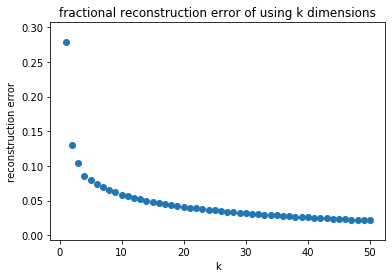

In [13]:
#calculate reconstruction error for k = 1,2,...,50
reconstruction_errors = [1-sum(Sigma_eigenvals_sorted[:k])/Sigma_eigenvals_sum for k in range(1,51)]
plt.scatter(x=range(1,51), y=np.real(reconstruction_errors))
plt.xlabel('k')
plt.ylabel('reconstruction error')
plt.title('fractional reconstruction error of using k dimensions')
#plt.savefig('reconstruction_error.png')
plt.show()

## Visualization of Eigen-Directions

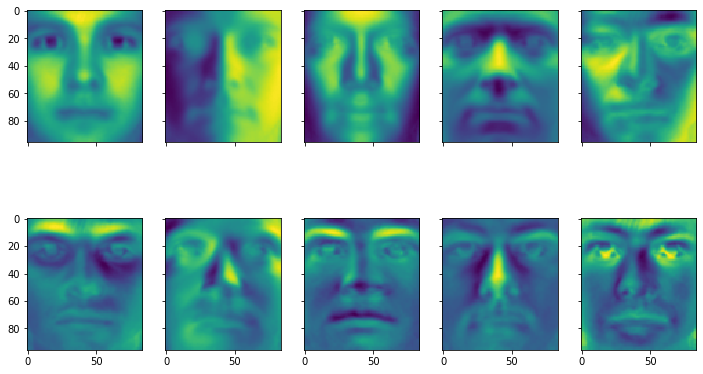

In [14]:
fig, axs = plt.subplots(2, 5, figsize=(12,7))
for i in range(2):
    for j in range(5):
        ind = 5*i+j
        axs[i,j].imshow(np.transpose(Sigma_eigenvecs_sorted[:,ind].reshape(84,96)))

for ax in axs.flat:
    ax.set(xlabel='', ylabel='')
for ax in axs.flat:
    ax.label_outer()
# plt.savefig('first_10_eigenvectors.png')

## Visualization and Reconstruction

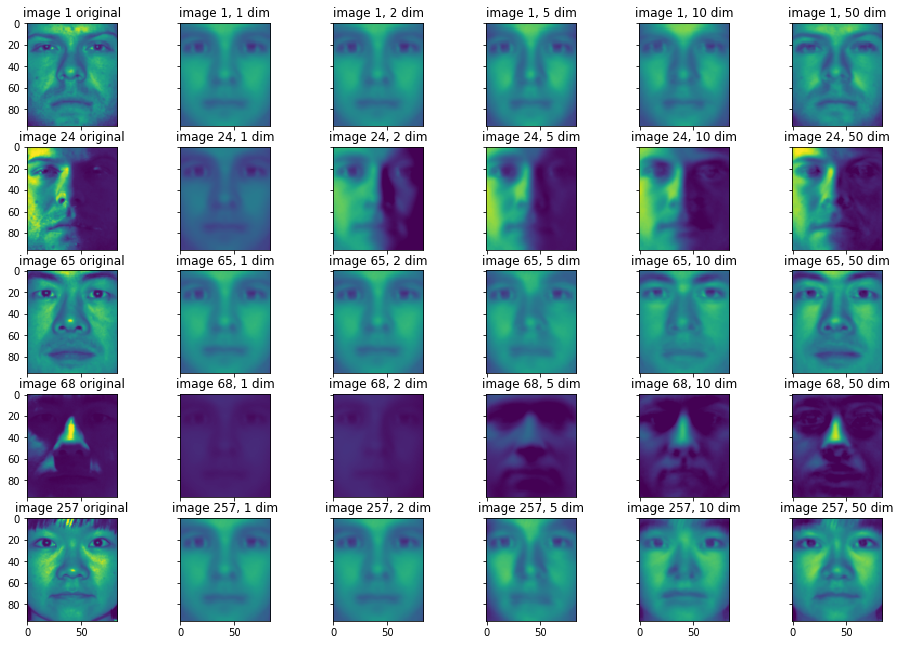

In [15]:
samples = np.array([0,23,64,67,256])
dims = np.array([0,1,2,5,10,50])
    
fig, axs = plt.subplots(nrows=len(samples), ncols=len(dims), figsize=(16,11))
for i in range(len(samples)):
    for j in range(len(dims)):
        if j==0:
            axs[i,j].imshow(np.transpose(X[samples[i],:].reshape(84,96)), vmin=0, vmax=1)
            axs[i,j].set_title('image '+str(samples[i]+1)+' original')
        else:
            k = dims[j]
            U = Sigma_eigenvecs_sorted[:,0:k]
            reconstructM = U.dot(np.transpose(U))
            projection = X[samples[i],:].dot(reconstructM)
            axs[i,j].imshow(np.transpose(projection.reshape(84,96)), vmin=0, vmax=1)
            axs[i,j].set_title('image '+str(samples[i]+1)+', '+str(dims[j])+' dim')
            
for ax in axs.flat:
    ax.set(xlabel='', ylabel='')
for ax in axs.flat:
    ax.label_outer()
# plt.savefig('image_reconstruction.png')

## Intepretation

Imaged in the second column have same faces but different lighting conditions. This is because images constructed from a single vector is just a scaler times that vectors; in this case, scaler controls the lighting condition.

The second eigenvector considers lighting from the right. Compare to the reconstructions using the first eigenvector only, using the first two eigenvectors do not show much difference for all 5 images except for image 24. This is because only image 24 has lighting from the side (from the left in the original image), so using the second eigenvector will reflect this. You can see that the right face in image 24 are easier to see in the reconstructions using the first two eigenvectors than in the original one.

Compare to using the first two eigenvectors (column 3 in Figure 3), using the first 5 eigenvectors (column 4) will show more details in the nasal part and consider lighting from the top. You can see all images have been improved in the nasal area. The original image 68 are shot with lighting from the top, so the reconstruction of it is much improved here, because the 4th eigenvector considers lighting from the top and is now used in the reconstruction. The reconstruction for image 65 here also show some wrenkles, which I believe is captured by the 4th and 5th eigenvectors.

The 6th to the 10th eigenvectors capture detials in the fronal and optical area, so images in the 4th column are improved mainly in the upper area of faces. This is particularly obvious with image 65 and image 257. In image 65, now the reconstruction realizes the person has thick browns, and in image 257, the reconstruction recognized the person’s bang.

We can see that with 50 eigenvectors (the last column), the reconstructions are very close to the original ones. This is because the first 50 eigenvectors capture 97% of the total variance.